<h1 align='center'> Parkinson’s Disease Classification </h1>
<h5 align='center'> ---------------------------------------------------------------------------- </h5>

Name: Logesh.V <br>
Email: vlogesh2001@gmail.com <br>

--------------------------------

### Import Libraries

In [1]:
#Import Libraries
import sys
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Data Analysis
<br>Reading the data csv file as dataframe and printing first 5 rows

In [2]:
dff = pd.read_csv("parkinsons.data")
print("Dimensions = ",dff.shape)
features = list(dff.columns.values)
print("\nFeatures:\n", features)
print("\nData :")
dff.head()

Dimensions =  (195, 24)

Features:
 ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Data :


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##### Matrix column attributes:
| Features | Description 
| ----------- | ----------- |
| name | ASCII subject name and recording number |
| MDVP:Fo(Hz) | Average vocal fundamental frequency |
| MDVP:Fhi(Hz) | Maximum vocal fundamental frequency |
| MDVP:Flo(Hz) | Minimum vocal fundamental frequency |
| MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP | Several measures of variation in fundamental frequency |
| MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA | Several measures of variation in amplitude |
| NHR, HNR | Two measures of the ratio of noise to tonal components in the voice |
| status | The health status of the subject (one) - Parkinson's, (zero) - healthy |
| RPDE, D2 | Two nonlinear dynamical complexity measures |
| DFA | Signal fractal scaling exponent |
| spread1, spread2, PPE | Three nonlinear measures of fundamental frequency variation |

In [3]:
#Data information
print("Info :", dff.info())
print("\n\nDiscription :")
dff.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
dff['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

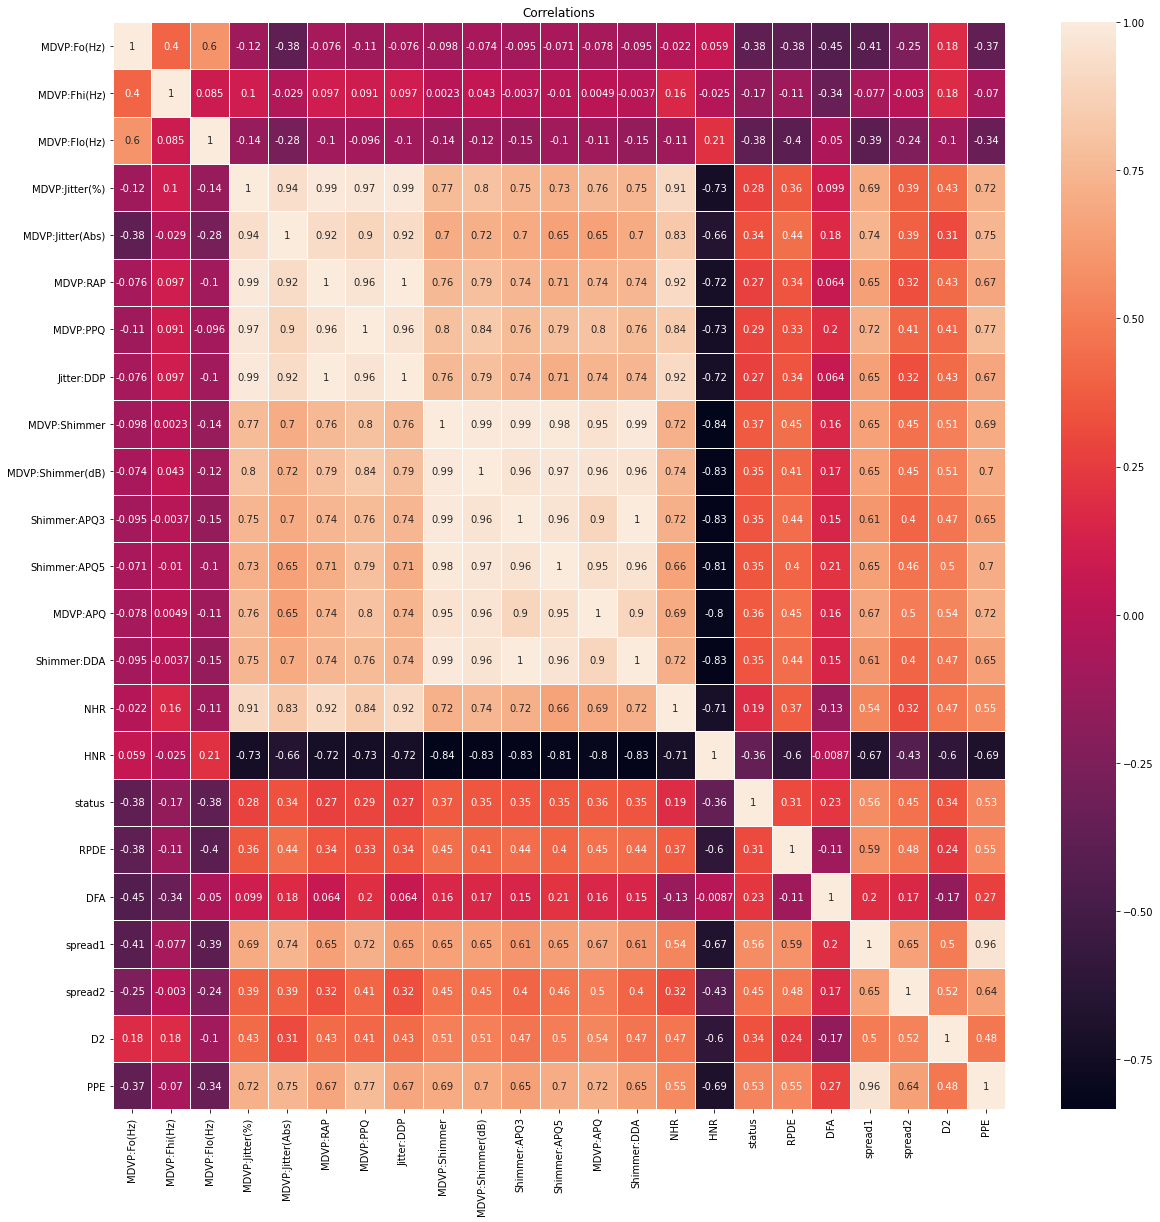

In [5]:
#just checking correlations
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlations")
sns.heatmap(dff.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

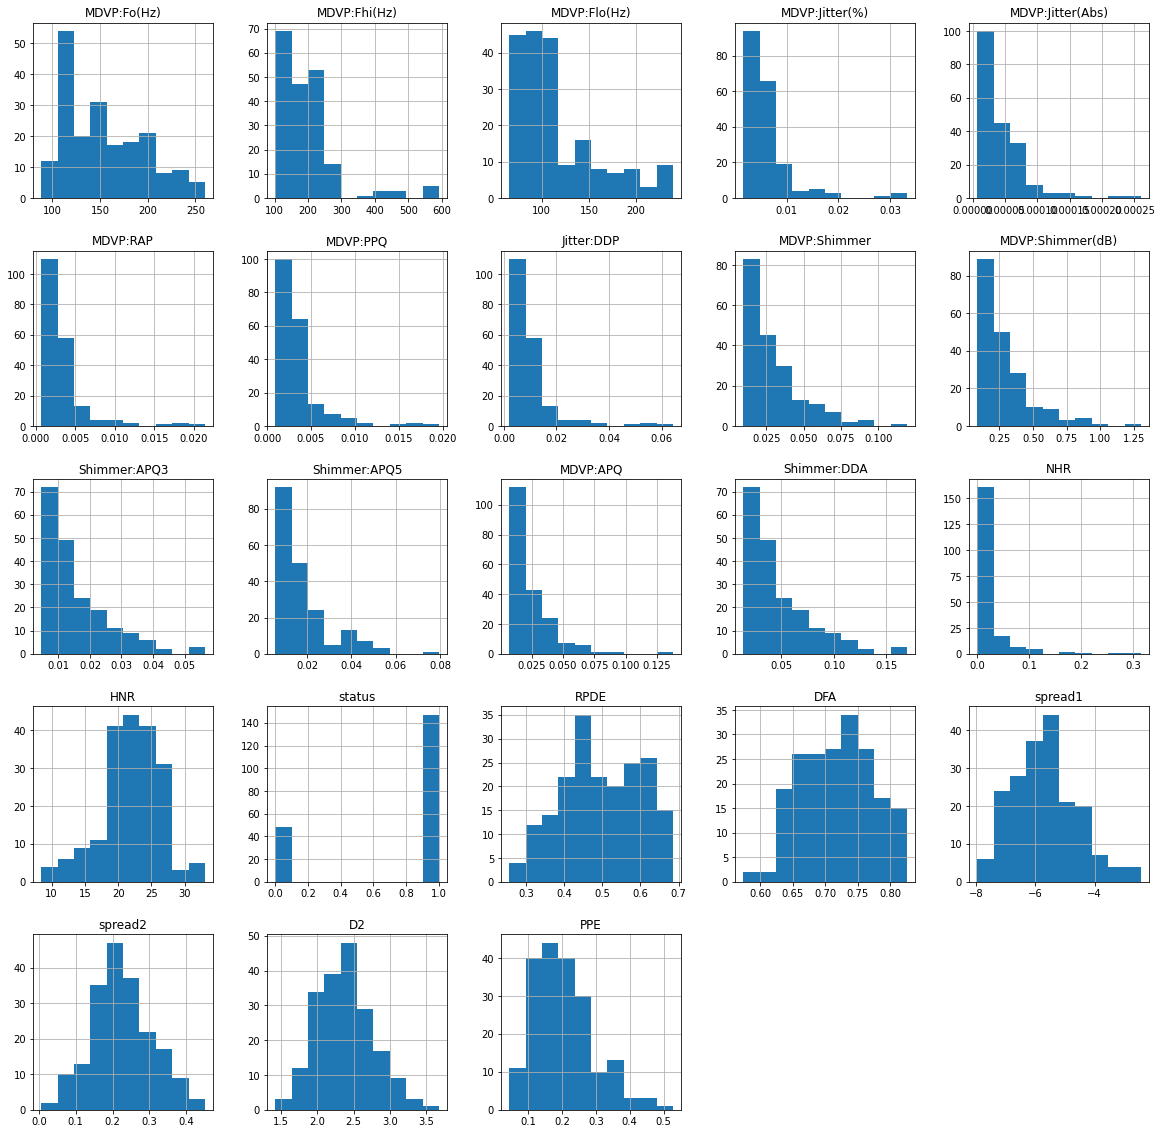

In [6]:
dff.hist(figsize=(20,20))
plt.show()

` We can observe that some of the data is normally distributed and most of the attributes are right skewed `
- so we need to scale the data into a common range before classification methods

<br>Converting Dataframe to Numpy Arrays, so it would be numerical values instead of string</br>
<br>X -> input data features
<br>Y -> input data classification</br>

In [7]:
i = features.index('status')
# ignore ID column (first column)
X = np.concatenate((dff.iloc[:,1:i].values , dff.iloc[:,i:None].values), axis=1)
Y = dff.iloc[:,i].values
print("\nDimentions of X:",X.shape, "\tDimentions of Y:", Y.shape)

np.set_printoptions(precision=2, suppress=True, threshold=500) #changing printing options

print("\n\nX data: \n", X)
print("\nY data: \n", Y)

sc = StandardScaler()
X_sc = sc.fit_transform(X)
print("\n Scaled X data: \n", X_sc)


Dimentions of X: (195, 23) 	Dimentions of Y: (195,)


X data: 
 [[119.99 157.3   75.   ...   0.27   2.3    0.28]
 [122.4  148.65 113.82 ...   0.34   2.49   0.37]
 [116.68 131.11 111.56 ...   0.31   2.34   0.33]
 ...
 [174.69 240.    74.29 ...   0.16   2.68   0.13]
 [198.76 396.96  74.9  ...   0.21   2.14   0.12]
 [214.29 260.28  77.97 ...   0.19   2.56   0.15]]

Y data: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]

 Scaled X data: 
 [[-0.83 -0.44 -0.95 ...  0.48 -0.21  0.87]
 [-0.77 -0.53 -0.06 ...  1.31  0.28  1.8 ]
 [-0.91 -0.72 -0.11 ...  1.02 -0.1   1.4 ]
 ...
 [ 0.5   0.47 -0.97 ... -0.82  0.78 -0.83]
 [ 1.08  2.19 -0.95 ... -0.23 -

<br>Spliting the dataset into Train Data and Test Data based on some ratio

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, Y, test_size=0.225, random_state=0)
print("Train Set Dimensions:\n X:", X_train.shape, "\n Y:", Y_train.shape)
print("\nTest Set Dimensions:\n X:", X_test.shape, "\n Y:", Y_test.shape)
np.set_printoptions(precision=2, suppress=True, threshold=50) #changing printing options

Train Set Dimensions:
 X: (151, 23) 
 Y: (151,)

Test Set Dimensions:
 X: (44, 23) 
 Y: (44,)


## Logistic Regression Classification

(Logistic Regression) Test Data Accuracy: 100.0 %	 Train Data Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

Test Data Confusion Matrix:
 [[10  0]
 [ 0 34]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        34

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Test Data Total Correct Prediction = 44 / 44


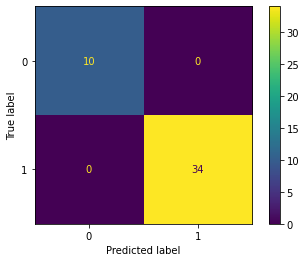


Train Data Confusion Matrix:
 [[ 38   0]
 [  0 113]]

Train Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       113

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151


Train Data Total Correct Prediction = 151 / 151


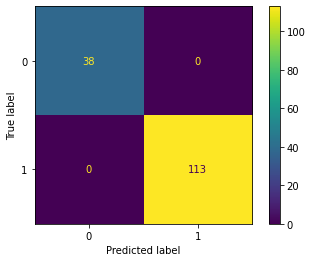

In [9]:
#1-> Logistic Regression (This is classified based on 2 Outcome classifaction here)

log = LogisticRegression()
log.fit(X_train, Y_train)

test_Y_pred = log.predict(X_test)
train_Y_pred = log.predict(X_train)
CM_test = confusion_matrix(Y_test, test_Y_pred)
CM_train = confusion_matrix(Y_train, train_Y_pred)

print("(Logistic Regression) Test Data Accuracy:", accuracy_score(Y_test, test_Y_pred)*100, "%\t", "Train Data Accuracy:", accuracy_score(Y_train, train_Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((test_Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
print("\nTest Data Confusion Matrix:\n", CM_test)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, test_Y_pred))
print("\nTest Data Total Correct Prediction =", CM_test.trace(), "/", X_test.shape[0])
plot_confusion_matrix(log, X_test, Y_test)
plt.show()
print("\nTrain Data Confusion Matrix:\n", CM_train)
print("\nTrain Data Classification Report:")
print(classification_report(Y_train, train_Y_pred))
print("\nTrain Data Total Correct Prediction =", CM_train.trace(), "/", X_train.shape[0])
plot_confusion_matrix(log, X_train, Y_train)
plt.show()

In [10]:
#Example data: 
test_id = random.randint(0,dff.shape[0])
Model_Prediction = log.predict(sc.transform([X[test_id]]))
print("Model Prediction if the person has Parkinson’s disease =", "Yes" if Model_Prediction else "No\n")
dff.iloc[[test_id]]

Model Prediction if the person has Parkinson’s disease = Yes


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
143,phon_R01_S34_4,202.805,231.508,86.232,0.0037,0.00002,0.00189,0.00211,0.00568,0.01997,...,0.0335,0.0201,18.687,1,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032


## **K**-Nearest Neighbors Classification

K-Value = 1 		Accuracy: 100.0 %
K-Value = 2 		Accuracy: 100.0 %
K-Value = 3 		Accuracy: 100.0 %

(KNN-classification) K-Neighbhor: 1 		Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Confusion Matrix:
 [[10  0]
 [ 0 34]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        34

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Total Correct Prediction = 44 / 44


<Figure size 432x288 with 0 Axes>

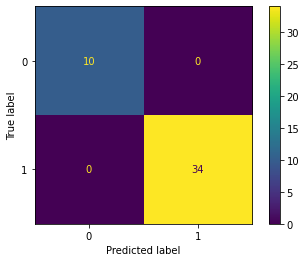

In [11]:
#2-> KNN Classification
#The best accuracy is usually in the middle not too high or not too low, so it needs to be found out by hit and trial
acc = 0
K = 0
for i in range(1,int(math.sqrt(len(features)))): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    print("K-Value =", i, "\t\tAccuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
    
    if(accuracy_score(Y_test, Y_pred)*100 > acc):
        acc = accuracy_score(Y_test, Y_pred)*100
        Y_pred_final = Y_pred
        K = i
        plt.clf()
        plot_confusion_matrix(knn, X_test, Y_test)

print("\n(KNN-classification) K-Neighbhor:", K, "\t\tAccuracy:", accuracy_score(Y_test, Y_pred_final)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred_final.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred_final)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred_final))
print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plt.show()

## SVM (Linear & **RBF**) Classification

(SVC - 'linear') Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Confusion Matrix:
 [[10  0]
 [ 0 34]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        34

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Total Correct Prediction = 44


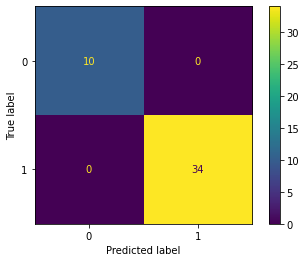




(SVC - 'rbf') Accuracy: 100.0 %

Test Data [Prediction | Actual results]:
[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]

 Confusion Matrix:
 [[10  0]
 [ 0 34]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        34

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Total Correct Prediction = 44 / 44


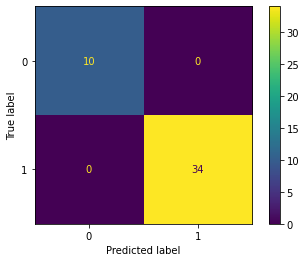

In [12]:
#3-> SVM

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print("(SVC - 'linear') Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
print("\nTotal Correct Prediction =", CM.trace())
plot_confusion_matrix(svc, X_test, Y_test)
plt.show()

svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print("\n\n\n(SVC - 'rbf') Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)
print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plot_confusion_matrix(svc, X_test, Y_test)
plt.show()

--------------------------------------------------------------------------------------------------
### x---------------------------- Thanking You ----------------------------x
--------------------------------------------------------------------------------------------------